# GPT-4o Vision

GPT-4o (omni) 와 GPT-4 Turbo with Vision은 이미지를 분석하고 이미지에 대한 질문에 텍스트 응답을 제공할 수 있는 OpenAI에서 개발한 LMM(대형 다중 모드 모델)입니다. 이는 자연어 처리와 시각적 이해를 모두 통합합니다.

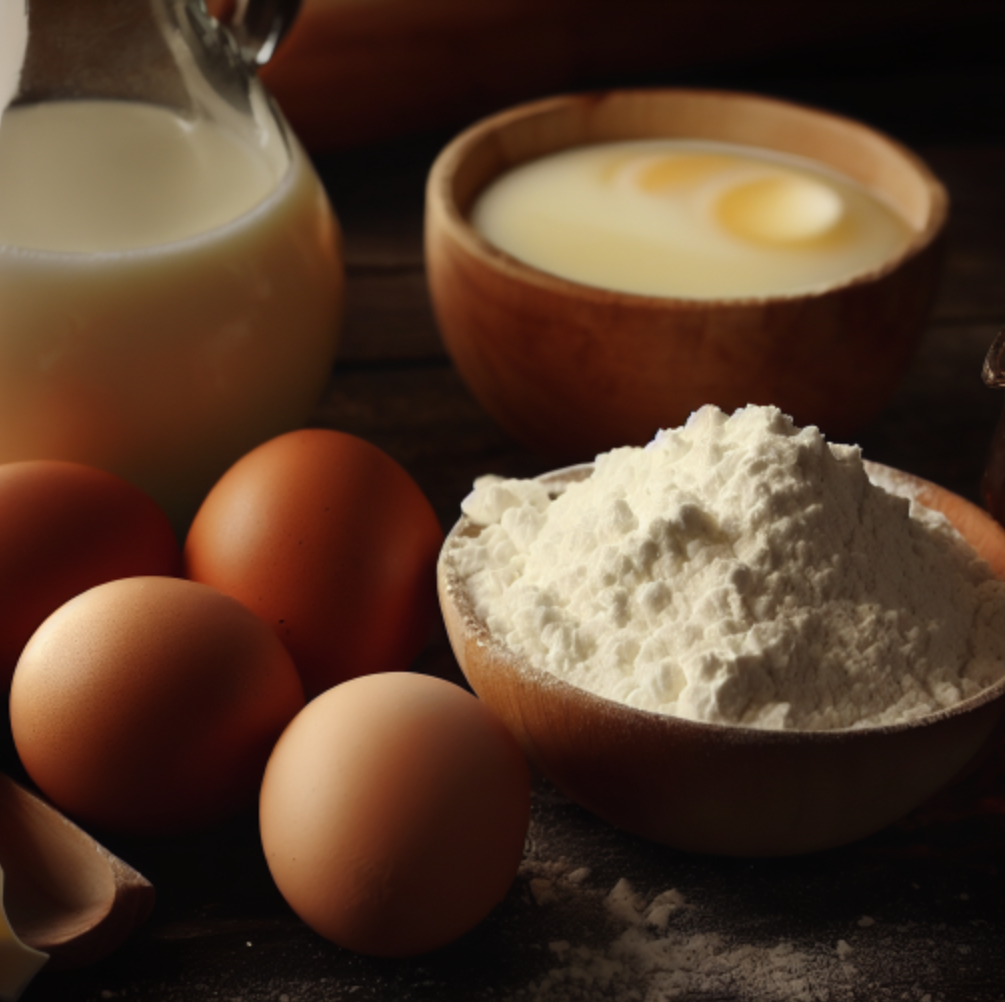

In [1]:
from PIL import Image
from IPython.display import display

# data 파일의 이미지 
filename = "ingredients.png"
# "GenX_MZ_image.png"

# 이미지 열기
img = Image.open('data/'+filename)

# 이미지 표시
display(img)


In [2]:
import os
import requests
import base64
from dotenv import load_dotenv
load_dotenv()

# Configuration
GPT4V_KEY = os.getenv('GPT_4_VISION_API_KEY')


IMAGE_PATH = "./data/"+filename
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
headers = {
    "Content-Type": "application/json",
    "api-key": GPT4V_KEY,
}

# Payload for the request
payload = {
  "messages": [
    {
      "role": "system",
      "content": [
        {
          "type": "text",
          "text": "You are an AI assistant that helps people find information."
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{encoded_image}"
          }
        },
        {
          "type": "text",
          "text": "이 사진에 대해서 자세히 설명해줘."
        }
      ]
    }
  ],
  "temperature": 0.7,
  "top_p": 0.95,
  "max_tokens": 800
}

GPT4V_ENDPOINT = f"{os.getenv('GPT_4_VISION_ENDPOINT')}openai/deployments/{os.getenv('GPT_4_VISION_DEPLOYMENT_NAME')}/chat/completions?api-version=2024-02-15-preview"

# Send request
try:
    response = requests.post(GPT4V_ENDPOINT, headers=headers, json=payload)
    response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code
except requests.RequestException as e:
    raise SystemExit(f"Failed to make the request. Error: {e}")

# Handle the response as needed (e.g., print or process)
print(response.json()['choices'][0]['message']['content'])

이 사진은 요리에 사용되는 재료들이 잘 정리되어 있는 모습을 보여줍니다. 나무 테이블 위에 놓여 있으며, 사진의 분위기는 따뜻하고 자연스러운 느낌을 줍니다.

사진의 구성 요소는 다음과 같습니다:

1. **계란**: 사진 왼쪽 하단에 여러 개의 갈색 계란이 놓여 있습니다. 일부는 껍질이 깨져 있어, 계란의 내용물이 보입니다.
2. **밀가루**: 중앙에 나무 그릇에 담긴 밀가루가 있습니다. 밀가루는 부드럽고 가벼운 느낌을 주며, 일부는 그릇 밖으로 흘러나와 있습니다.
3. **우유**: 사진 왼쪽 상단에는 유리병에 담긴 우유가 있습니다. 우유는 요리 재료로 자주 사용되며, 병의 목 부분이 잘린 형태로 보입니다.
4. **계란 혼합물**: 오른쪽 상단의 나무 그릇에는 이미 깨진 계란이 우유와 섞여 있는 모습입니다. 두 개의 노른자가 뚜렷하게 보입니다.

이 재료들은 주로 베이킹이나 다양한 요리에 기본적으로 사용되는 것들입니다. 예를 들어, 케이크, 빵, 팬케이크 등을 만들 때 이러한 재료들이 흔히 필요합니다. 사진은 따뜻하고 아늑한 주방의 느낌을 잘 전달하며, 요리나 베이킹의 준비 과정을 떠올리게 합니다.
